# INN Hotels Project

**By Yuchen Wang**

## Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

## Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


## Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from sklearn.exceptions import ConvergenceWarning
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)

<IPython.core.display.Javascript object>

In [2]:
# Import Data
INN = pd.read_csv(
    "https://raw.githubusercontent.com/ycwang15/PGP_DSBA/Data/INNHotelsGroup.csv"
)

<IPython.core.display.Javascript object>

In [3]:
INN_copy = INN.copy()

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

### Visit the first and last five rows of the data

In [4]:
INN.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

In [5]:
INN.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


<IPython.core.display.Javascript object>

### Understanding the shape of data

In [6]:
INN.shape

(36275, 19)

<IPython.core.display.Javascript object>

* There are 36275 rows and 10 columns in this dataset.

In [7]:
INN.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000


<IPython.core.display.Javascript object>

### Check the data types of the columns for the dataset.

In [8]:
INN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

* There are five columns data are the object type of data.
* Other columns are numeric columns.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Answers to key questions

<AxesSubplot:xlabel='arrival_month', ylabel='count'>

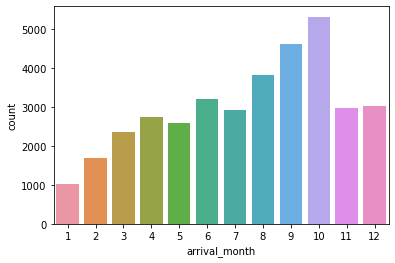

<IPython.core.display.Javascript object>

In [9]:
# Question 1
sns.countplot(data=INN, x="arrival_month")

* From this countplot we can know that there are more guests from June to October, and October is the busiest month during a year, and this chart also reflect that from June to Octorber is the peak season of travel, and other months are the off season of the travel. That is reasonable, because students have summer holiday, they might travel during that period.

<AxesSubplot:xlabel='market_segment_type', ylabel='count'>

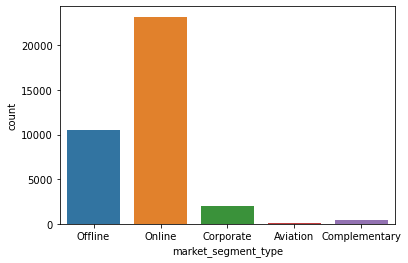

<IPython.core.display.Javascript object>

In [10]:
# Question 2
sns.countplot(data=INN, x="market_segment_type")

* Most customers booked hotel rooms online.

In [11]:
# Question 3
Sum_price_room_type = (
    INN.groupby(by=["market_segment_type"])["avg_price_per_room"]
    .sum()
    .sort_values(ascending=False)
)
Sum_price_room_type

market_segment_type
Online          2605930.63000
Offline          964708.84000
Corporate        167232.98000
Aviation          12588.00000
Complementary      1228.43000
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

In [12]:
Avg_price_room_type = (
    INN.groupby(by=["market_segment_type"])["avg_price_per_room"]
    .mean()
    .sort_values(ascending=False)
)
Avg_price_room_type

market_segment_type
Online          112.25685
Aviation        100.70400
Offline          91.63268
Corporate        82.91174
Complementary     3.14176
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

* Because most customers were booked online, the online segment got the most price in total, offline is the second, and complementary least.
* For the average price for each segment, online is the highest, aviation is the second, and complementary is the least.

In [13]:
# Question 4
INN["booking_status"].value_counts(normalize=True)

Not_Canceled   0.67236
Canceled       0.32764
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

* Nearly 33% of orders had been canceled by the customers.

In [14]:
# Question 5
INN.groupby(by=["repeated_guest"])["booking_status"].value_counts(normalize=True)

repeated_guest  booking_status
0               Not_Canceled     0.66420
                Canceled         0.33580
1               Not_Canceled     0.98280
                Canceled         0.01720
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

* There are only 1.7% repeated guest canceled orders, this percentage is much lower than that of new customers.

<AxesSubplot:xlabel='no_of_special_requests', ylabel='count'>

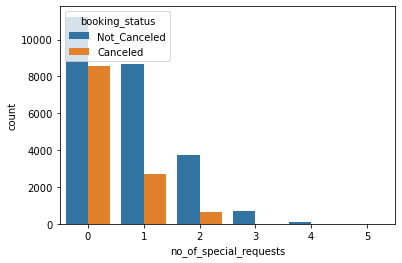

<IPython.core.display.Javascript object>

In [15]:
# Question 6
sns.countplot(data=INN, x="no_of_special_requests", hue="booking_status")

In [16]:
INN.groupby(by=["no_of_special_requests"])["booking_status"].value_counts(
    normalize=True
)

no_of_special_requests  booking_status
0                       Not_Canceled     0.56793
                        Canceled         0.43207
1                       Not_Canceled     0.76233
                        Canceled         0.23767
2                       Not_Canceled     0.85403
                        Canceled         0.14597
3                       Not_Canceled     1.00000
4                       Not_Canceled     1.00000
5                       Not_Canceled     1.00000
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

* Most guests do not have special needs, but the probability of cancellations is higher for this group. We can see that as the number of special needs increases, the proportion of guests canceling orders decreases.

### General EDA & Data visualization

In [17]:
INN.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


<IPython.core.display.Javascript object>

#### To understand the data distribution of the columns of the continuous feature.

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

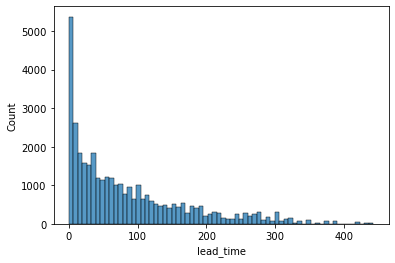

<IPython.core.display.Javascript object>

In [18]:
sns.histplot(data=INN, x="lead_time")

* The vast majority of people have a small number of days between their scheduled time and their arrival time.

<AxesSubplot:xlabel='avg_price_per_room', ylabel='Count'>

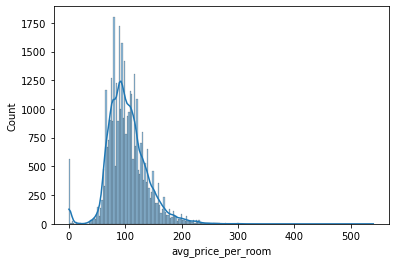

<IPython.core.display.Javascript object>

In [19]:
sns.histplot(data=INN, x="avg_price_per_room", kde=True)

<AxesSubplot:xlabel='avg_price_per_room'>

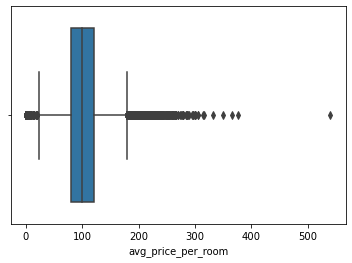

<IPython.core.display.Javascript object>

In [20]:
sns.boxplot(data=INN, x="avg_price_per_room")

* Most price are between the 50 dollar and 200 dollar.

<AxesSubplot:xlabel='no_of_previous_cancellations', ylabel='Count'>

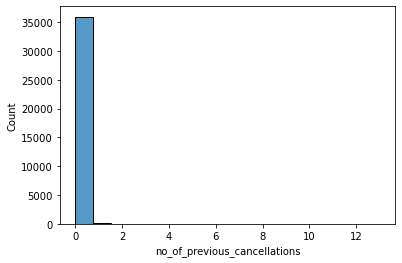

<IPython.core.display.Javascript object>

In [21]:
sns.histplot(data=INN, x="no_of_previous_cancellations")

<AxesSubplot:xlabel='no_of_previous_cancellations'>

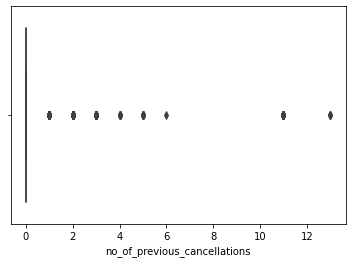

<IPython.core.display.Javascript object>

In [22]:
sns.boxplot(data=INN, x="no_of_previous_cancellations")

<AxesSubplot:xlabel='no_of_previous_bookings_not_canceled', ylabel='Count'>

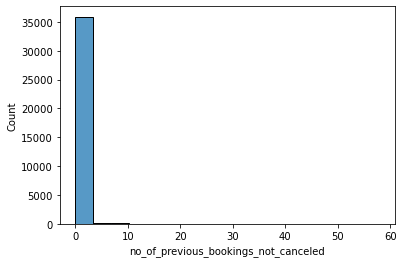

<IPython.core.display.Javascript object>

In [23]:
sns.histplot(data=INN, x="no_of_previous_bookings_not_canceled")

* Most people do not have cancellations in the past.
* The number of uncancelled previous bookings is also 0 at most

#### Plot countplot to see how many unique values are in a particular variable

<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

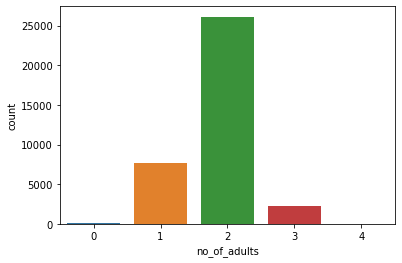

<IPython.core.display.Javascript object>

In [24]:
sns.countplot(data=INN, x="no_of_adults")

* Most have two adults, who are likely to be couples or couples with children.

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

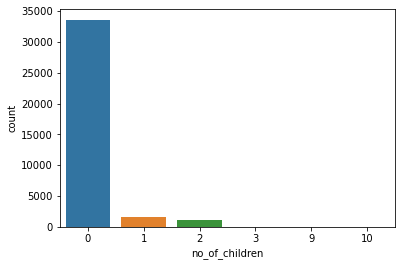

<IPython.core.display.Javascript object>

In [25]:
sns.countplot(data=INN, x="no_of_children")

* Most family has less and equal to two children.

<AxesSubplot:xlabel='no_of_weekend_nights', ylabel='count'>

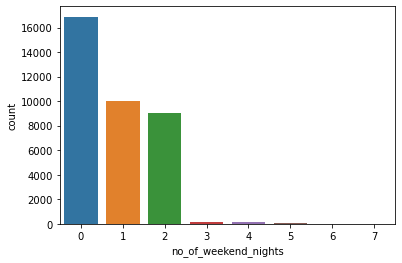

<IPython.core.display.Javascript object>

In [26]:
sns.countplot(data=INN, x="no_of_weekend_nights")

<AxesSubplot:xlabel='no_of_week_nights', ylabel='count'>

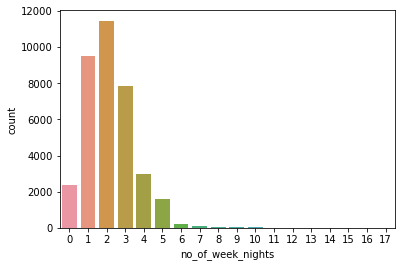

<IPython.core.display.Javascript object>

In [27]:
sns.countplot(data=INN, x="no_of_week_nights")

* The period for most orders is within a week as only two days are on weekends, and most orders have days between 1 to 5 days.

<AxesSubplot:xlabel='required_car_parking_space', ylabel='count'>

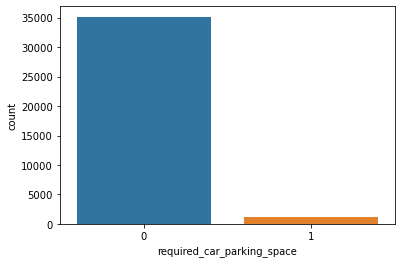

<IPython.core.display.Javascript object>

In [28]:
sns.countplot(data=INN, x="required_car_parking_space")

* Most customers do not need parking space which means they probably travel by public transportation.

<AxesSubplot:xlabel='type_of_meal_plan', ylabel='count'>

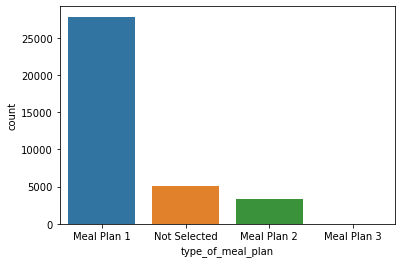

<IPython.core.display.Javascript object>

In [29]:
sns.countplot(data=INN, x="type_of_meal_plan")

* Most customers chose breakfast and anthor meal.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Room_Type 1'),
  Text(1, 0, 'Room_Type 4'),
  Text(2, 0, 'Room_Type 2'),
  Text(3, 0, 'Room_Type 6'),
  Text(4, 0, 'Room_Type 5'),
  Text(5, 0, 'Room_Type 7'),
  Text(6, 0, 'Room_Type 3')])

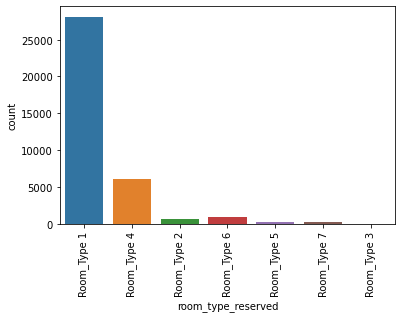

<IPython.core.display.Javascript object>

In [30]:
sns.countplot(data=INN, x="room_type_reserved")
plt.xticks(rotation=90)

* There are 7 different types in the hotel, and most customers chose the type1.

<AxesSubplot:xlabel='no_of_special_requests', ylabel='count'>

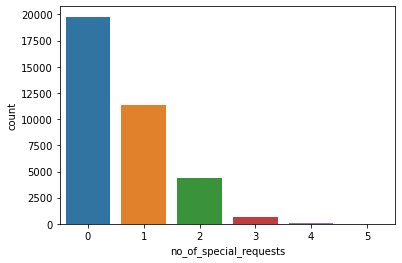

<IPython.core.display.Javascript object>

In [31]:
sns.countplot(data=INN, x="no_of_special_requests")

* Most customers have no special requests, fewer people as the increase of the number of the request.

#### Obviously, booking_status is the dependent varible, let's make a heatmap to see the correlation between numeric feature and dependent variable.
##### In order to make this heatplot, we need to convert the data type of booking status from object into numeric.

In [32]:
INN["booking_status"] = INN["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)
INN.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,1
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,1


<IPython.core.display.Javascript object>

<AxesSubplot:>

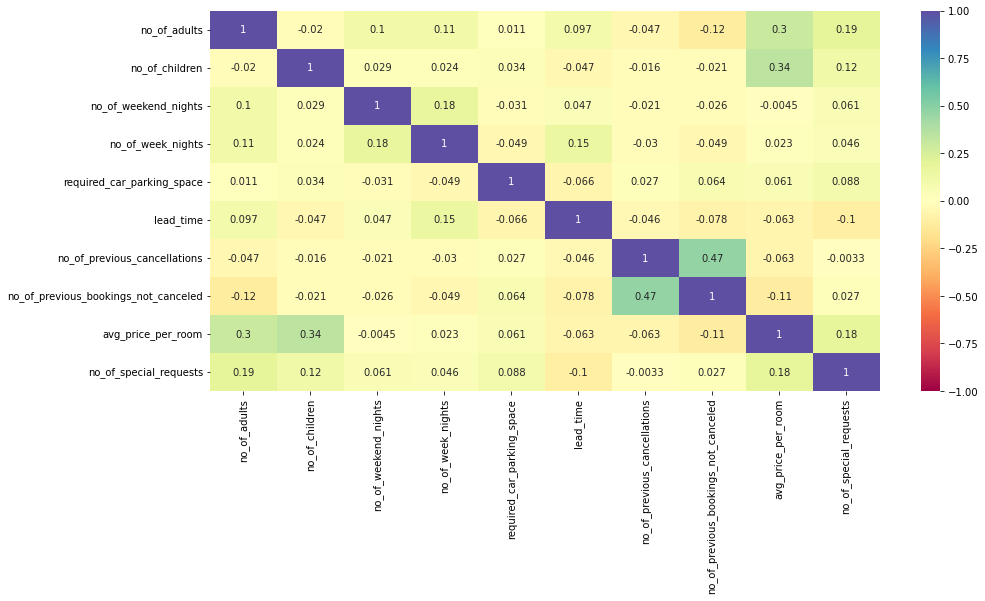

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(15, 7))
corr = INN[
    [
        "no_of_adults",
        "no_of_children",
        "no_of_weekend_nights",
        "no_of_week_nights",
        "required_car_parking_space",
        "lead_time",
        "no_of_previous_cancellations",
        "no_of_previous_bookings_not_canceled",
        "avg_price_per_room",
        "no_of_special_requests",
    ]
]
sns.heatmap(data=corr.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")

* Through this heatmap, we can find that there is only a low correlation between the vast majority of features.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Checking for missing values

In [34]:
INN.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

* There are no null values in the dataset

### Dropping the duplicate values

In [35]:
# checking for duplicate values
INN.duplicated().sum()

0

<IPython.core.display.Javascript object>

* There are no duplicate values in the data.

### Outlier detection

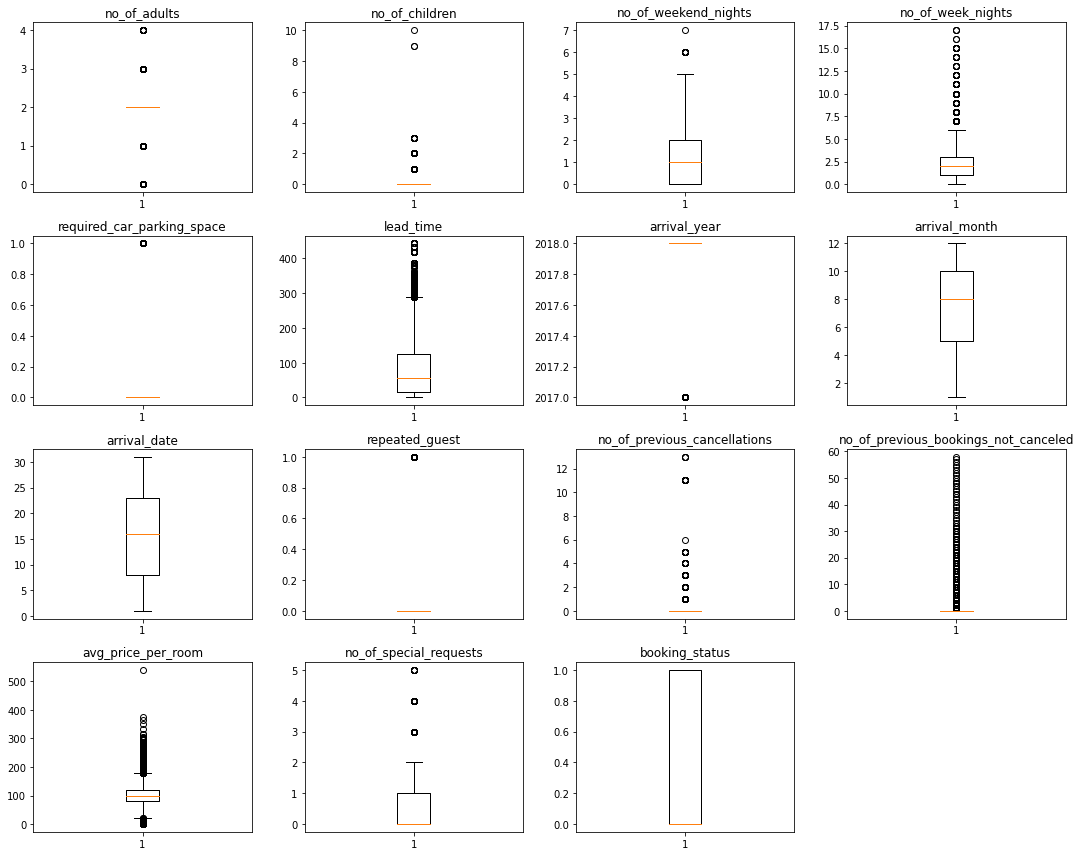

<IPython.core.display.Javascript object>

In [36]:
numeric_columns = INN.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(INN[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)


Observations

*    There are quite a few outliers in the data.
*    Logistic Regression is sensitive to outliers.
*    Decision Tree is not sensitive to outliers.
*    However, I won't deal with them as they are from the real world.

### Feature engineering

In [37]:
print(INN.type_of_meal_plan.value_counts())
print(INN.room_type_reserved.value_counts())
print(INN.market_segment_type.value_counts())
print(INN.booking_status.value_counts())

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
0    24390
1    11885
Name: booking_status, dtype: int64


<IPython.core.display.Javascript object>

* There are 4 types of meal plan those are plan1, plan2, plan3, and not selected.
* There are 7 types of room: type1, type2, type3, type4, type5, type6, type7.
* There are 5 types of market segment those are online, offline, corporate, complementary and aciation.
* For the dependent variable booking status, there are only two types which are not canceled and canceled.
* The `Booking_ID` column is containing unique values.

### Treating Year, Month and Date columns.

* For date, I think different periods will have a crucial impact on whether customers cancel their reservations. For example, students have summer vacations in summer, the number of outbound tourists has increased sharply, and traffic congestion may cause guests to be unable to achieve the original plan, so the number of cancellations may increase. In the off-season, such as February and March, when there are no holidays, although the number of people traveling is small, due to the convenient transportation, people will most likely complete the established plan, that is, arrive at the destination and hotel on time.
* So I would split the date data into the travel peak season and travel off season. For peak seaon, they are from June to October(Included), off season is other months in a year. And we can also split one month in two different periods, that is early and late of one month, so all in all, the date will be split into four different categories, which are early of peak season month, late of peak season month, early of off season month and late of off season month.
* For the arrival_year column, I believe it can be deleted because 12 months are a cycle, all festivals and travel peaks will be cycled by one year, and the year does not play a decisive role, especially in 2017 and 2018. In the pre-covid19 era, there was no significant difference between the two years.

In [38]:
INN = INN.drop(["arrival_year"], axis=1)

<IPython.core.display.Javascript object>

In [39]:
INN["month"] = INN.arrival_month.apply(
    lambda x: "peak_season_month" if x >= 6 and x <= 10 else "off_season_month"
)
INN["date"] = INN.arrival_date.apply(lambda y: "early" if y <= 15 else "late")

<IPython.core.display.Javascript object>

* And now we can delete the columns of "arrival_month", "arrival_date".

In [40]:
INN = INN.drop(["arrival_month", "arrival_date"], axis=1)

<IPython.core.display.Javascript object>

In [41]:
INN.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,month,date
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00000,0,0,peak_season_month,early
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68000,1,0,off_season_month,early
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00000,0,1,off_season_month,late
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00000,0,1,off_season_month,late
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50000,0,1,off_season_month,early


<IPython.core.display.Javascript object>

In [42]:
INN.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,month,date
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80000,1,0,peak_season_month,early
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95000,2,1,peak_season_month,late
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39000,2,0,peak_season_month,early
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50000,0,1,off_season_month,late
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,Offline,0,0,0,161.67000,0,0,off_season_month,late


<IPython.core.display.Javascript object>

* It looks pretty good now, and we will combine "month" and "date" into one column to analyze it more conveniently.

In [43]:
INN["day_of_month"] = INN["date"].str.cat(INN["month"], sep=" of ")
INN = INN.drop(["month", "date"], axis=1)

<IPython.core.display.Javascript object>

In [44]:
INN.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,day_of_month
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00000,0,0,early of peak_season_month
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68000,1,0,early of off_season_month
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00000,0,1,late of off_season_month
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00000,0,1,late of off_season_month
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50000,0,1,early of off_season_month


<IPython.core.display.Javascript object>

* All done about date and month, let's see the data.info again.

In [45]:
INN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   market_segment_type                   36275 non-null  object 
 10  repeated_guest                        36275 non-null  int64  
 11  no_of_previous_

<IPython.core.display.Javascript object>

#### Dropping the columns with all unique values

In [46]:
INN.Booking_ID.nunique()

36275

<IPython.core.display.Javascript object>

* The `Booking_ID` column contains only unique values, so we can drop it

In [47]:
INN = INN.drop(["Booking_ID"], axis=1)

<IPython.core.display.Javascript object>

### Statistical summary of the data

**Let's check the statistical summary of the data.**

In [48]:
INN.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
repeated_guest,36275.00000,0.02564,0.15805,0.00000,0.00000,0.00000,0.00000,1.00000
no_of_previous_cancellations,36275.00000,0.02335,0.36833,0.00000,0.00000,0.00000,0.00000,13.00000
no_of_previous_bookings_not_canceled,36275.00000,0.15341,1.75417,0.00000,0.00000,0.00000,0.00000,58.00000
avg_price_per_room,36275.00000,103.42354,35.08942,0.00000,80.30000,99.45000,120.00000,540.00000


<IPython.core.display.Javascript object>

In [49]:
INN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   market_segment_type                   36275 non-null  object 
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

<IPython.core.display.Javascript object>

In [50]:
INN.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,day_of_month
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00000,0,0,early of peak_season_month
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68000,1,0,early of off_season_month
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00000,0,1,late of off_season_month
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00000,0,1,late of off_season_month
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50000,0,1,early of off_season_month


<IPython.core.display.Javascript object>

* We are all set now.

### Data Preparation for modeling

In [51]:
X = INN.drop(["booking_status"], axis=1)
Y = INN["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [52]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

In [53]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,day_of_month_early of peak_season_month,day_of_month_late of off_season_month,day_of_month_late of peak_season_month
0,2,0,1,2,0,224,0,0,0,65.00000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,2,0,2,3,0,5,0,0,0,106.68000,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,2,1,0,1,0,0,0,60.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,2,0,0,2,0,211,0,0,0,100.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,2,0,1,1,0,48,0,0,0,94.50000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [54]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

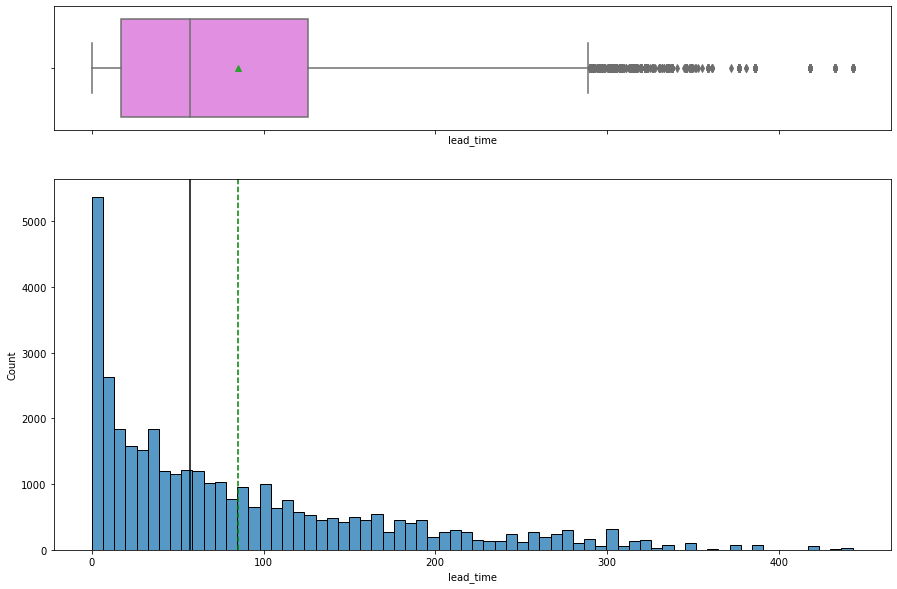

<IPython.core.display.Javascript object>

In [55]:
histogram_boxplot(INN, "lead_time")

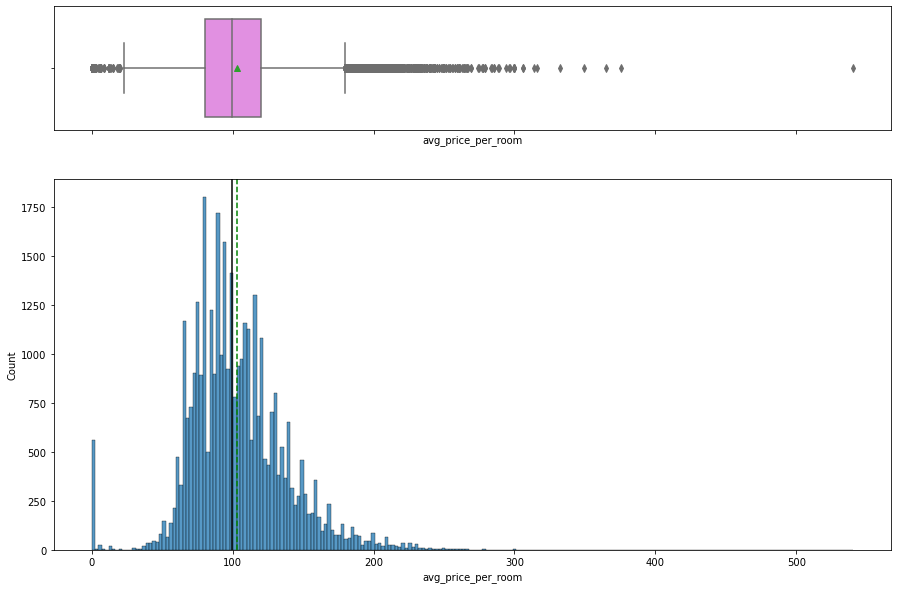

<IPython.core.display.Javascript object>

In [56]:
histogram_boxplot(INN, "avg_price_per_room")

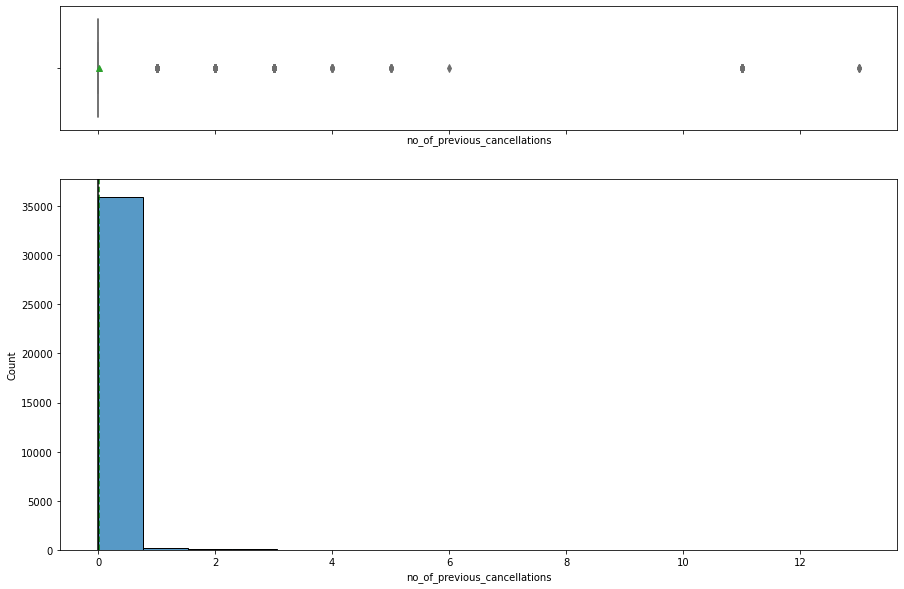

<IPython.core.display.Javascript object>

In [57]:
histogram_boxplot(INN, "no_of_previous_cancellations")

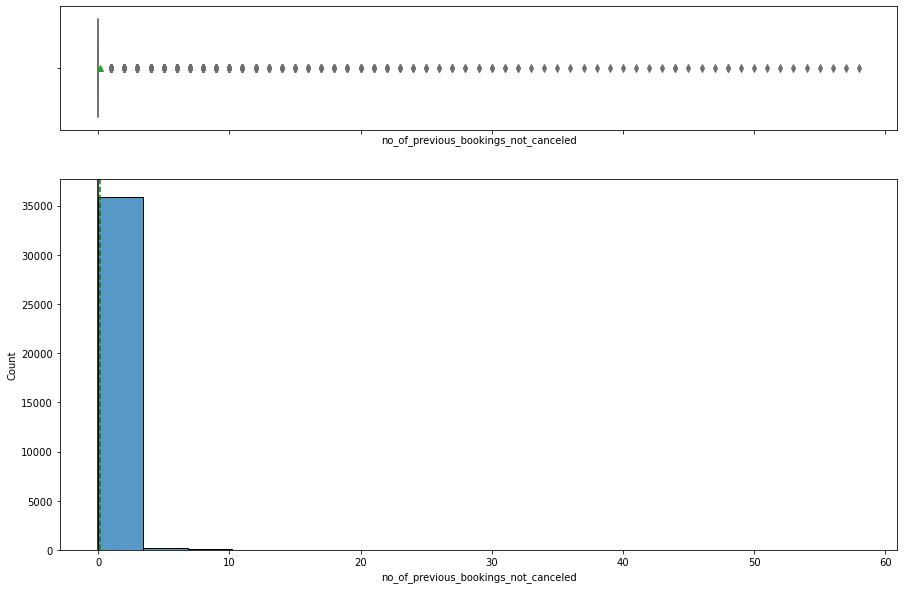

<IPython.core.display.Javascript object>

In [58]:
histogram_boxplot(INN, "no_of_previous_bookings_not_canceled")

<AxesSubplot:>

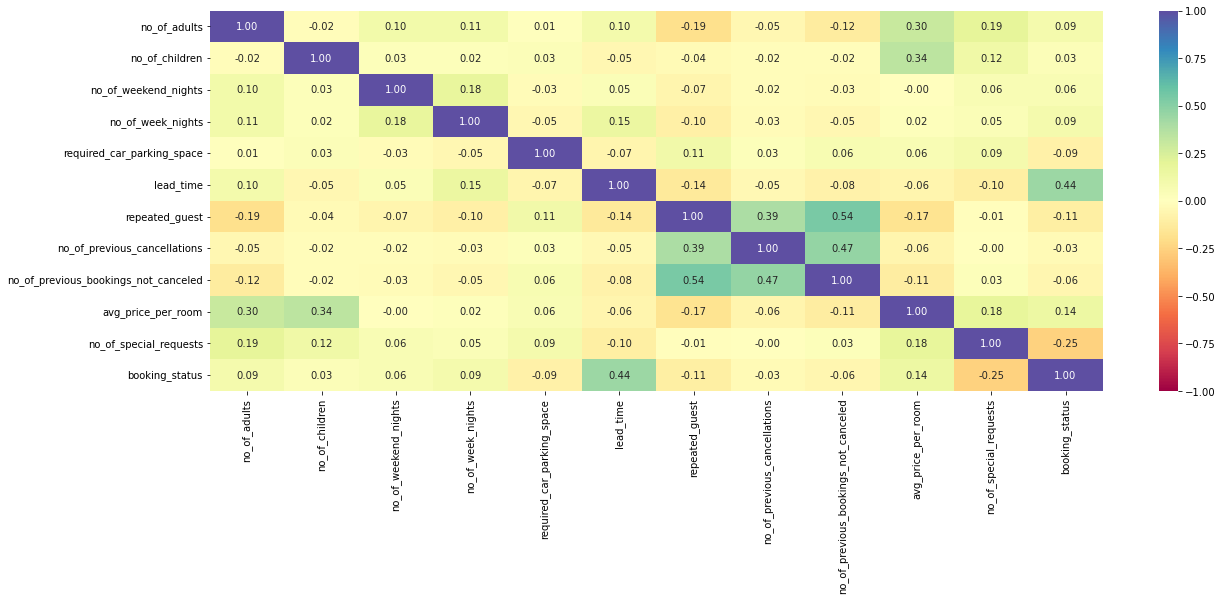

<IPython.core.display.Javascript object>

In [59]:
cols_list = INN.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20, 7))
sns.heatmap(
    INN[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

* After we created dummy variables and replaced specific string variables with numbers, and plotted the heatmap we found that most variables still did not have high correlation coefficients, which is a good thing for creating logistic models.

## Logistic Regression

### Creating Training and Test dataset

In [60]:
X = INN.drop(["booking_status"], axis=1)
Y = INN["booking_status"]

X = sm.add_constant(X)

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

### Model Building

In [61]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                  0.3243
Time:                        22:14:59   Log-Likelihood:                -10874.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -2.7888      0.260    -10.744      0.000      -3.298      -2.280
no_of_adults                                

<IPython.core.display.Javascript object>

### Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a customer will not cancel but in reality, the customers will cancel (FN)
- Predicting a customer will cancel but in reality, the customers will not cancel (FP)

**Which case is more important?**

* Both the cases are important as:

* If it is predicted that the customer will not cancel the order, and finally the customer cancels the order, the hotel will not be able to sell the room in a short period of time, which will result in a loss of hotel profits.

* If a customer is predicted to cancel an order, but the customer does not cancel, the customer is likely to be dissatisfied with the hotel's lack of preparation, which will damage the hotel's brand image.

**How to reduce the losses?**

* Hotel would want F1 Score to be maximized, greater the F1  score higher are the chances of minimizing False Negatives and False Positives. 

In [62]:
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [63]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

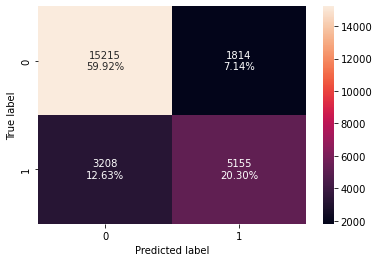

<IPython.core.display.Javascript object>

In [64]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [65]:
print("Training performance:")
Logistic_raw = model_performance_classification_statsmodels(lg, X_train, y_train)
Logistic_raw

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80222,0.61641,0.73970,0.67245


<IPython.core.display.Javascript object>


- The f1_score of the model is 0.67 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [66]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                     322.98889
no_of_adults                                1.34987
no_of_children                              1.97755
no_of_weekend_nights                        1.06801
no_of_week_nights                           1.09720
required_car_parking_space                  1.03940
lead_time                                   1.28378
repeated_guest                              1.78041
no_of_previous_cancellations                1.39271
no_of_previous_bookings_not_canceled        1.64735
avg_price_per_room                          2.11881
no_of_special_requests                      1.22590
type_of_meal_plan_Meal Plan 2               1.20997
type_of_meal_plan_Meal Plan 3               1.02510
type_of_meal_plan_Not Selected              1.23570
room_type_reserved_Room_Type 2              1.10073
room_type_reserved_Room_Type 3              1.00324
room_type_reserved_Room_Type 4              1.36233
room_type_reserved_Room_Type 

<IPython.core.display.Javascript object>

Observation:
- If Vif is higher than 5, we can say that the feature has high collinearity.
- We can noticed that market type complementary, corporate, offline and online have high vif score.
- Because all of them come from the same category, so I will get rid of them one by one.


In [67]:
X_train2 = X_train.drop(["market_segment_type_Corporate",], axis=1,)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                     41.98857
no_of_adults                               1.34550
no_of_children                             1.97744
no_of_weekend_nights                       1.06583
no_of_week_nights                          1.09534
required_car_parking_space                 1.03940
lead_time                                  1.28365
repeated_guest                             1.77545
no_of_previous_cancellations               1.39225
no_of_previous_bookings_not_canceled       1.64525
avg_price_per_room                         2.11734
no_of_special_requests                     1.22570
type_of_meal_plan_Meal Plan 2              1.20996
type_of_meal_plan_Meal Plan 3              1.02510
type_of_meal_plan_Not Selected             1.23489
room_type_reserved_Room_Type 2             1.10070
room_type_reserved_Room_Type 3             1.00324
room_type_reserved_Room_Type 4             1.35466
room_type_reserved_Room_Type 5             1.02

<IPython.core.display.Javascript object>

In [68]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80269,0.61808,0.74001,0.67357


<IPython.core.display.Javascript object>

In [69]:
X_train3 = X_train.drop(["market_segment_type_Offline",], axis=1,)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const                                     32.24593
no_of_adults                               1.33366
no_of_children                             1.97722
no_of_weekend_nights                       1.06691
no_of_week_nights                          1.09625
required_car_parking_space                 1.03914
lead_time                                  1.27944
repeated_guest                             1.77721
no_of_previous_cancellations               1.39250
no_of_previous_bookings_not_canceled       1.64714
avg_price_per_room                         2.11717
no_of_special_requests                     1.22561
type_of_meal_plan_Meal Plan 2              1.20874
type_of_meal_plan_Meal Plan 3              1.02510
type_of_meal_plan_Not Selected             1.23540
room_type_reserved_Room_Type 2             1.10073
room_type_reserved_Room_Type 3             1.00324
room_type_reserved_Room_Type 4             1.35266
room_type_reserved_Room_Type 5             1.02

<IPython.core.display.Javascript object>

In [70]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)

print("Training performance:")
model_performance_classification_statsmodels(lg3, X_train3, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79939,0.61401,0.73347,0.66845


<IPython.core.display.Javascript object>

* No significant change in the model performance.

**Observations:**
1. Dropping above features doesn't have a significant impact on the model performance.
2. We can choose any model to proceed to the next steps.
3. Here, we will go with the lg2 model - where we dropped market_segment_type_Corporate.

In [71]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                  0.3231
Time:                        22:15:02   Log-Likelihood:                -10892.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -3.9061      0.124    -31.599      0.000      -4.148      -3.664
no_of_adults                                

<IPython.core.display.Javascript object>

## Removing High P-value variables

* In the case of `day of month`, all the attributes have a high p-value, which means it is not significant. Therefore, we can drop the variable as a whole, i.e., we can drop all the dummy variables for the `day of month` variable
* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. 

In [72]:
X_train4 = X_train2.drop(
    [
        "day_of_month_early of peak_season_month",
        "day_of_month_late of off_season_month",
        "day_of_month_late of peak_season_month",
    ],
    axis=1,
)

logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit(method="bfgs")

print(lg4.summary())

         Current function value: 0.431845
         Iterations: 35
         Function evaluations: 38
         Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25368
Method:                           MLE   Df Model:                           23
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                  0.3186
Time:                        22:15:02   Log-Likelihood:                -10965.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                   

<IPython.core.display.Javascript object>

In [73]:
cols = X_train4.columns.tolist()

max_p_value = 1

while len(cols) > 0:

    X_train_aux = X_train4[cols]

    model = sm.Logit(y_train, X_train_aux).fit(disp=False, method="bfgs")

    p_values = model.pvalues
    max_p_value = max(p_values)

    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 4', 'market_segment_type_Offline', 'market_segment_type_Online']


<IPython.core.display.Javascript object>

In [74]:
X_train5 = X_train4[selected_features]

<IPython.core.display.Javascript object>

In [75]:
logit5 = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit5.fit(disp=False)

print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25379
Method:                           MLE   Df Model:                           12
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                  0.3195
Time:                        22:15:03   Log-Likelihood:                -10950.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.7242      0.107    -34.663      0.000      -3.935      -3.514
no_of_weekend_nights                     0.1098      

<IPython.core.display.Javascript object>

In [76]:
X_train6 = X_train5.drop(["room_type_reserved_Room_Type 4",], axis=1,)

logit6 = sm.Logit(y_train, X_train6.astype(float))
lg6 = logit6.fit()

print(lg6.summary())

Optimization terminated successfully.
         Current function value: 0.431311
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25380
Method:                           MLE   Df Model:                           11
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                  0.3194
Time:                        22:15:03   Log-Likelihood:                -10952.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.7090      0.

<IPython.core.display.Javascript object>

* Now, there's no p-value higher than 0.05.

### Checking performance of the new model

**Training set performance**

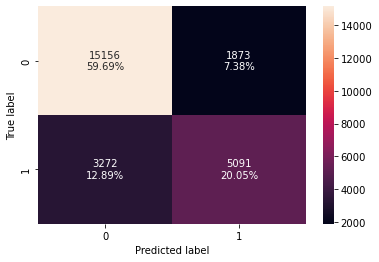

<IPython.core.display.Javascript object>

In [77]:
confusion_matrix_statsmodels(lg6, X_train6, y_train)

In [78]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg6, X_train6, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79738,0.60875,0.73105,0.66432


<IPython.core.display.Javascript object>

**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [79]:
X_test6 = X_test[list(X_train6.columns)]

<IPython.core.display.Javascript object>

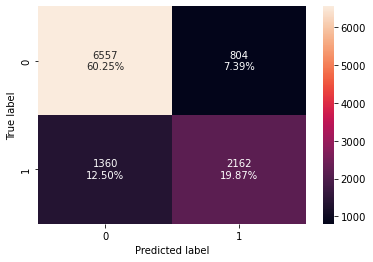

<IPython.core.display.Javascript object>

In [80]:
# creating confusion matrix
confusion_matrix_statsmodels(lg6, X_test6, y_test)

In [81]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg6, X_test6, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80116,0.61386,0.72893,0.66646


<IPython.core.display.Javascript object>

- The model is giving f1_score of 0.664 and 0.666 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward to improve the performance of the model

## Model Performance Improvement

### Trying to improve the F1 score by changing the threshold

### ROC Curve and ROC-AUC

* ROC-AUC on training set

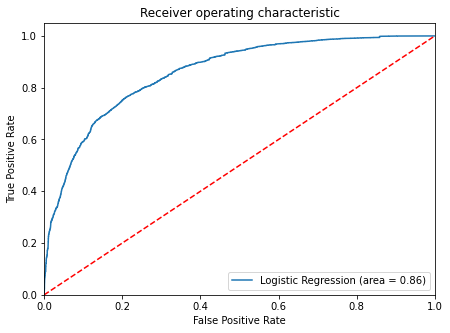

<IPython.core.display.Javascript object>

In [82]:
logit_roc_auc_train = roc_auc_score(y_train, lg6.predict(X_train6))
fpr, tpr, thresholds = roc_curve(y_train, lg6.predict(X_train6))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Optimal threshold using AUC-ROC curve

In [83]:
fpr, tpr, thresholds = roc_curve(y_train, lg6.predict(X_train6))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.32994067125716475


<IPython.core.display.Javascript object>

**Checking model performance on training set**

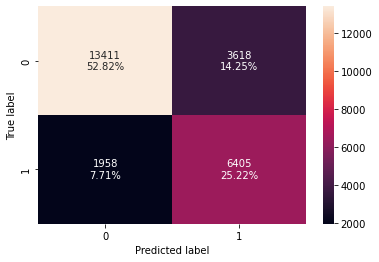

<IPython.core.display.Javascript object>

In [84]:
confusion_matrix_statsmodels(
    lg6, X_train6, y_train, threshold=optimal_threshold_auc_roc
)

In [85]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg6, X_train6, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78040,0.76587,0.63903,0.69673


<IPython.core.display.Javascript object>

* Recall and F1 score have increased significantly.

**Checking model performance on test set**

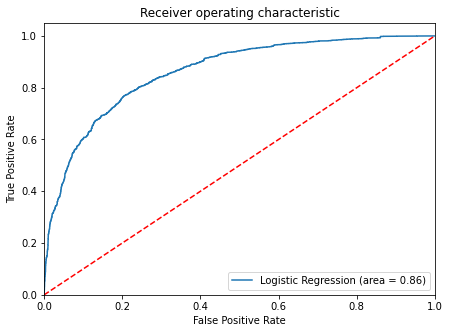

<IPython.core.display.Javascript object>

In [86]:
logit_roc_auc_train = roc_auc_score(y_test, lg6.predict(X_test6))
fpr, tpr, thresholds = roc_curve(y_test, lg6.predict(X_test6))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

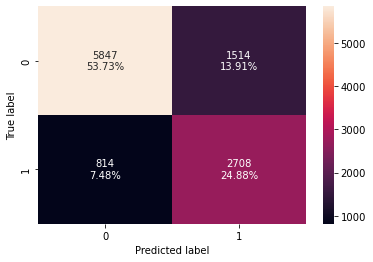

<IPython.core.display.Javascript object>

In [87]:
confusion_matrix_statsmodels(lg6, X_test6, y_test, threshold=optimal_threshold_auc_roc)

In [88]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg6, X_test6, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.78609,0.76888,0.64140,0.69938


<IPython.core.display.Javascript object>

### Precision-Recall Curve

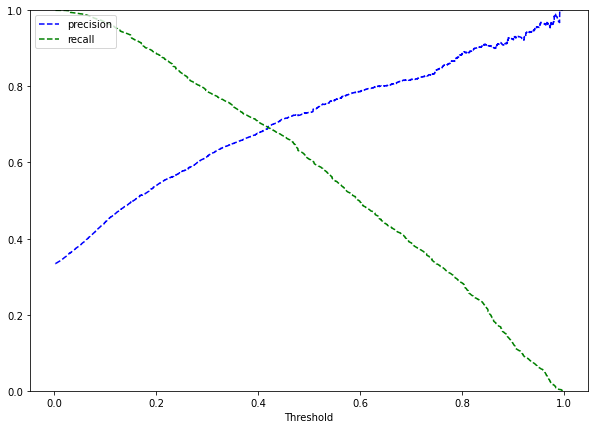

<IPython.core.display.Javascript object>

In [89]:
y_scores = lg6.predict(X_train6)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [90]:
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

**Checking model performance on training set**

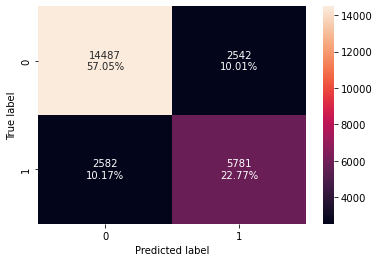

<IPython.core.display.Javascript object>

In [91]:
confusion_matrix_statsmodels(lg6, X_train6, y_train, threshold=optimal_threshold_curve)

In [92]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg6, X_train6, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.79820,0.69126,0.69458,0.69292


<IPython.core.display.Javascript object>

There's not much improvement in the model performance when the changed to 0.42.

**Checking model performance on test set**

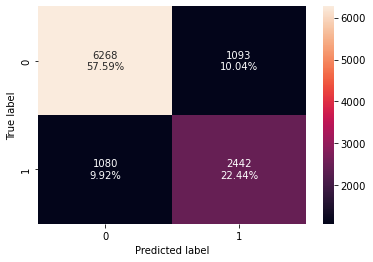

<IPython.core.display.Javascript object>

In [93]:
confusion_matrix_statsmodels(lg6, X_test6, y_test, threshold=optimal_threshold_curve)

In [94]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg6, X_test6, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.80033,0.69336,0.69081,0.69208


<IPython.core.display.Javascript object>

## Final Model Summary

* So, we will use the 6th version of dataset which contain const, no_of_weekend_nights, no_of_week_nights, required_car_parking_space, lead_time, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, type_of_meal_plan_Meal Plan 2, type_of_meal_plan_Not Selected, market_segment_type_Offline and market_segment_type_Online. And for the threshold, I will set it equal to 0.3299, which can get the highest f1 score among threshold=0.5, threshold=0.3299 and threshold=0.42.

* Training Performance

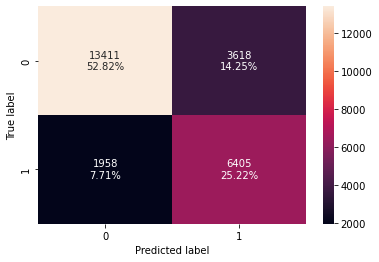

<IPython.core.display.Javascript object>

In [95]:
confusion_matrix_statsmodels(
    lg6, X_train6, y_train, threshold=optimal_threshold_auc_roc
)

In [96]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg6, X_train6, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.78040,0.76587,0.63903,0.69673


<IPython.core.display.Javascript object>

* Test Performance

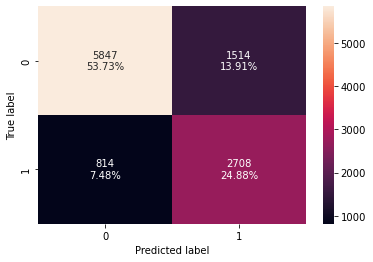

<IPython.core.display.Javascript object>

In [97]:
confusion_matrix_statsmodels(lg6, X_test6, y_test, threshold=optimal_threshold_auc_roc)

In [98]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg6, X_test6, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.78609,0.76888,0.64140,0.69938


<IPython.core.display.Javascript object>

###  Converting coefficients to odds

In [99]:
# converting coefficients to odds
odds = np.exp(lg6.params)

# finding the percentage change
perc_change_odds = (np.exp(lg6.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train6.columns).T

,const,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,market_segment_type_Offline,market_segment_type_Online
Odds,0.02450,1.11492,1.03743,0.20589,1.01595,0.50180,1.01719,0.23032,1.12985,1.45416,0.37053,2.31446
Change_odd%,-97.54989,11.49151,3.74292,-79.41138,1.59546,-49.82000,1.71876,-76.96842,12.98521,45.41615,-62.94657,131.44640


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `no_of_weekend_nights`: Holding all other features constant a unit change in no_of_weekend_nights will increase the odds of a booking order being cancelled by 1.11 times or a 11.49% increase in odds.
* `no_of_week_nights`: Holding all other features constant a unit change in no_of_week_nights will increase the odds of a booking order being cancelled by 1.03 times or a 3.74% increase in the odds.
* `required_car_parking_space`: Holding all other features constant a unit change in required_car_parking_space will decrease the odds of a booking order being cancelled by 0.21 times or a 79.41% increase in the odds.
* `lead_time`: Holding all other features constant a unit change in lead_time will increase the odds of a booking order being cancelled by 1.02 times or a 1.60% increase in the odds.
* `no_of_previous_bookings_not_canceled`: Holding all other features constant a unit change in no_of_previous_bookings_not_canceled will decrease the odds of a booking order being cancelled by 0.50 times or a 49.82% decrease in the odds.

`Interpretation for other attributes can be done similarly.`

## Building a Decision Tree model

#### Decision Tree(Default)

In [100]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [101]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [102]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

#### Checking model performance on training set

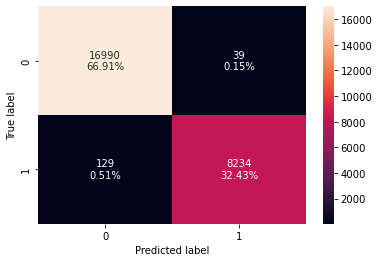

<IPython.core.display.Javascript object>

In [103]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [104]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,0.99338,0.98457,0.99529,0.98990


<IPython.core.display.Javascript object>

#### Checking model performance on test set

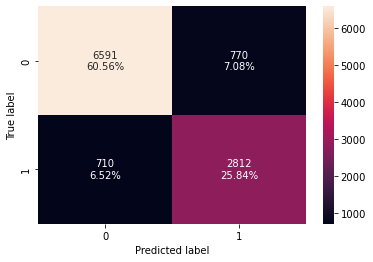

<IPython.core.display.Javascript object>

In [105]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [106]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.86401,0.79841,0.78504,0.79167


<IPython.core.display.Javascript object>

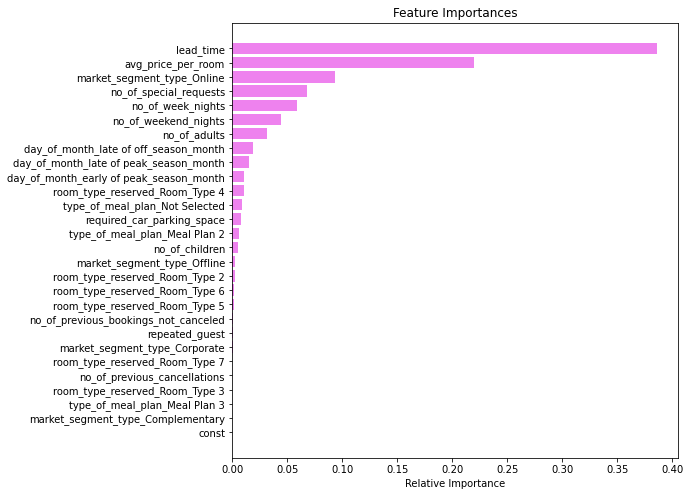

<IPython.core.display.Javascript object>

In [107]:
feature_names = list(X_train.columns)
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Decision Tree (with class_weights)

In [108]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

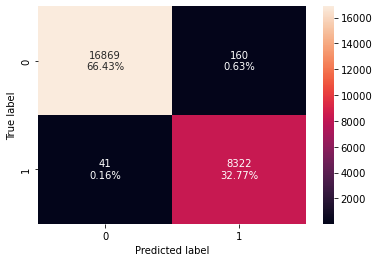

<IPython.core.display.Javascript object>

In [109]:
confusion_matrix_sklearn(model, X_train, y_train)

In [110]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99208,0.99510,0.98114,0.98807


<IPython.core.display.Javascript object>

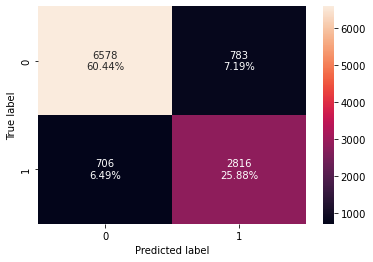

<IPython.core.display.Javascript object>

In [111]:
confusion_matrix_sklearn(model, X_test, y_test)

In [112]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86318,0.79955,0.78244,0.79090


<IPython.core.display.Javascript object>

## Prune the tree

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.
* So, we need to prune the tree.
* Here, I will apply post pruning method.

#### Decision Tree (Pre-pruning)

In [113]:
estimator = DecisionTreeClassifier(random_state=1)

parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

acc_scorer = make_scorer(f1_score)

grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

estimator = grid_obj.best_estimator_

estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

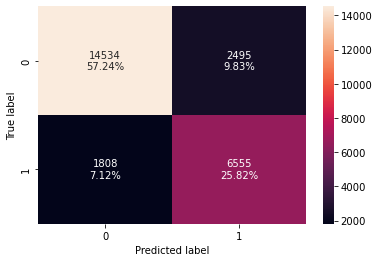

<IPython.core.display.Javascript object>

In [114]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [115]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.83054,0.78381,0.72431,0.75289


<IPython.core.display.Javascript object>

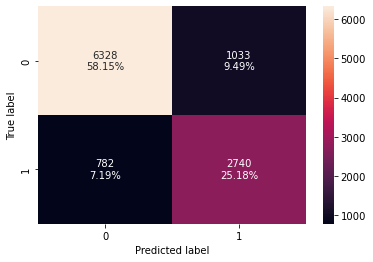

<IPython.core.display.Javascript object>

In [116]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [117]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.83323,0.77797,0.72621,0.75120


<IPython.core.display.Javascript object>

In [118]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

<IPython.core.display.Javascript object>

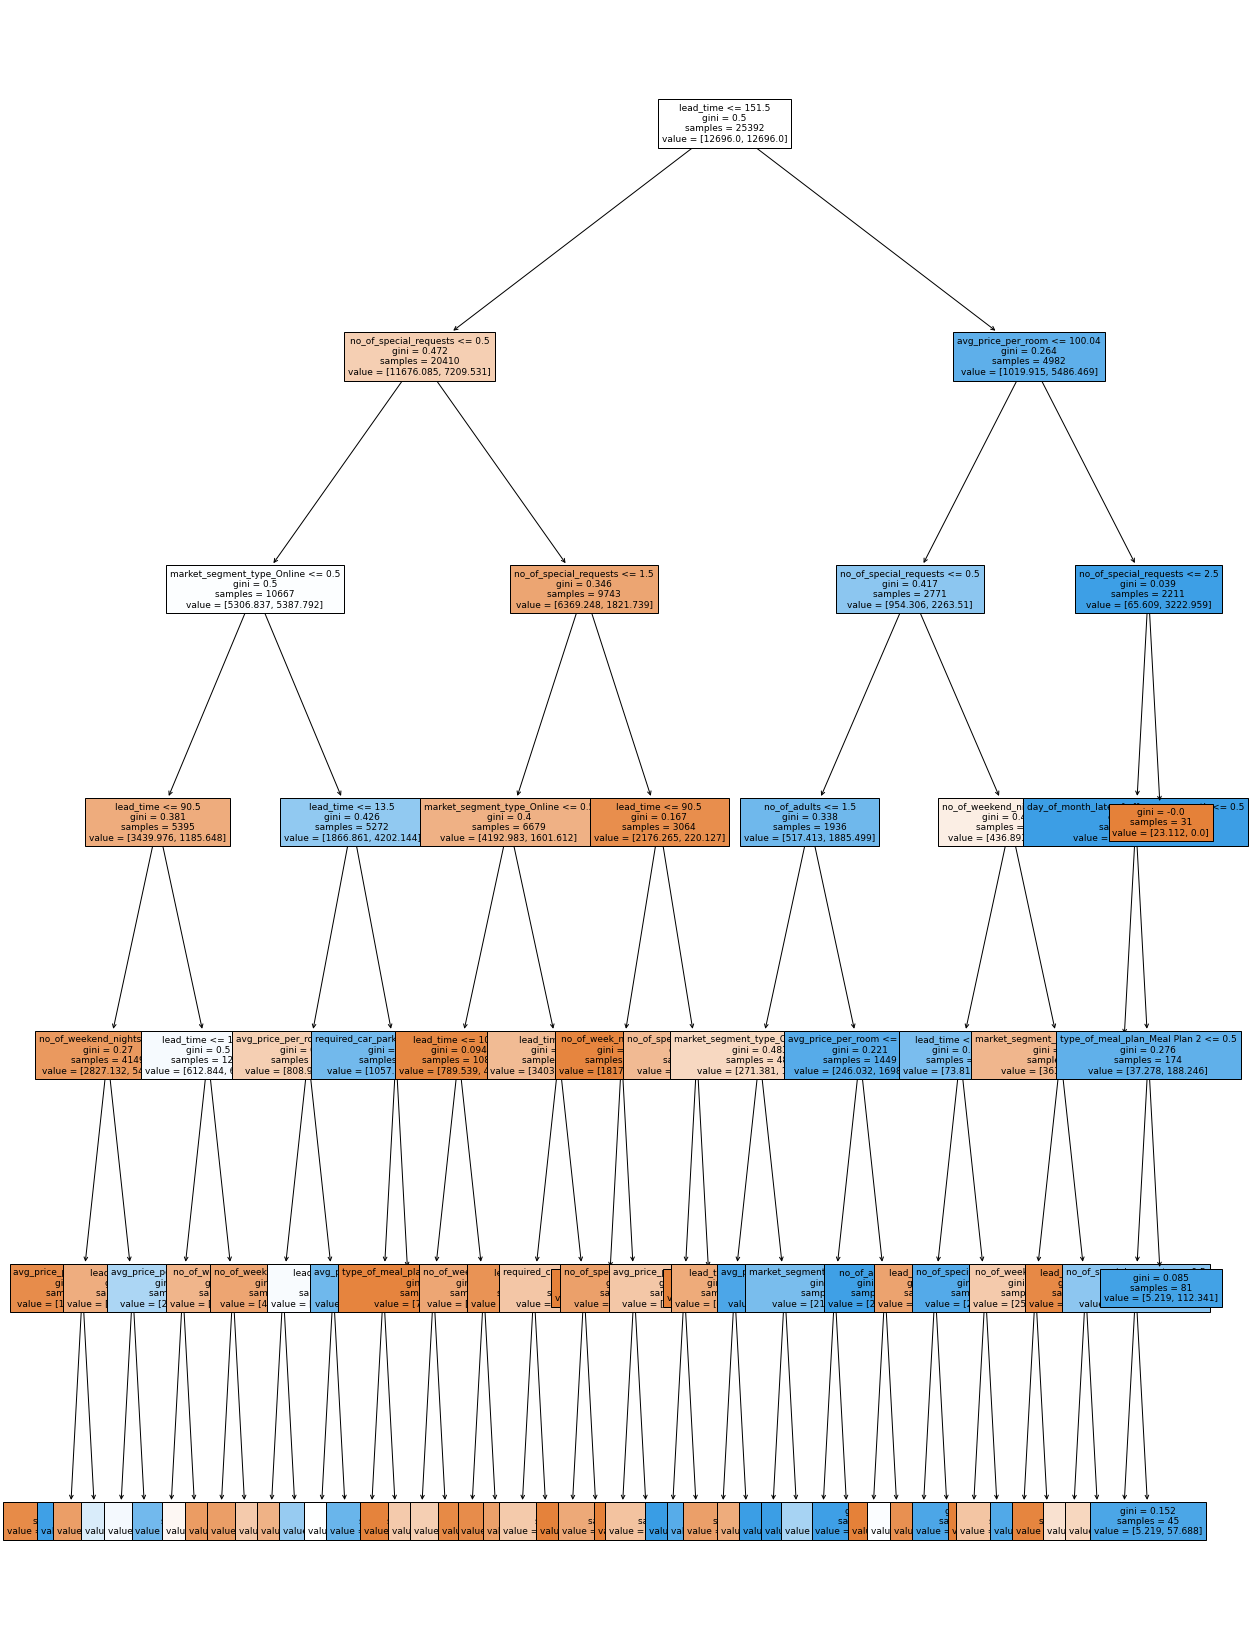

<IPython.core.display.Javascript object>

In [119]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [120]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

<IPython.core.display.Javascript object>

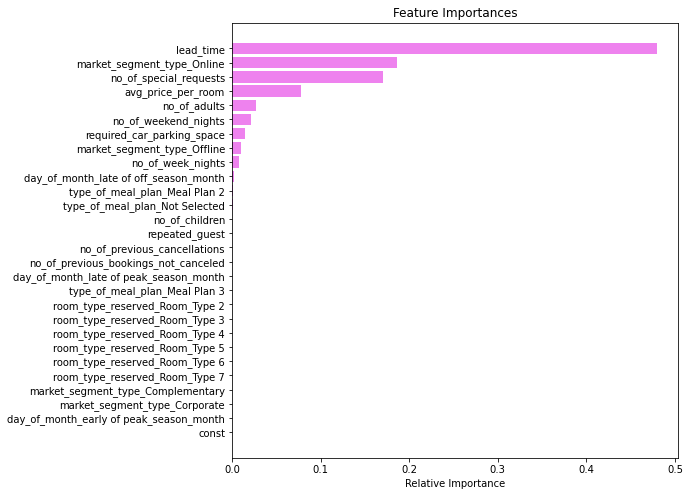

<IPython.core.display.Javascript object>

In [121]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Decision Tree (Post-pruning)

In [122]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [123]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00935
1,0.00000,0.00935
2,0.00000,0.00935
3,0.00000,0.00935
4,0.00000,0.00935
...,...,...
1958,0.00890,0.32806
1959,0.00980,0.33786
1960,0.01272,0.35058
1961,0.03412,0.41882


<IPython.core.display.Javascript object>

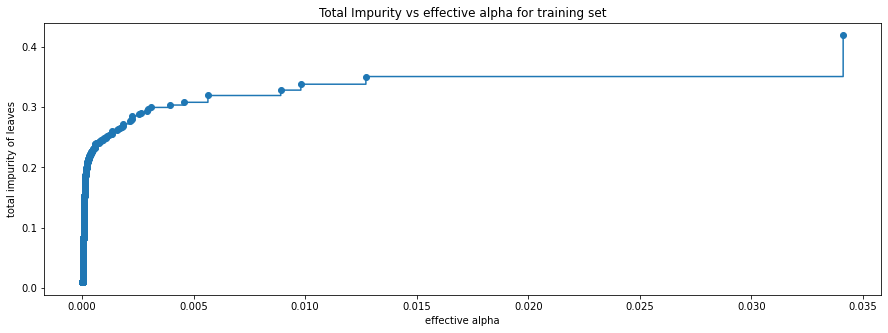

<IPython.core.display.Javascript object>

In [124]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [125]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389137054


<IPython.core.display.Javascript object>

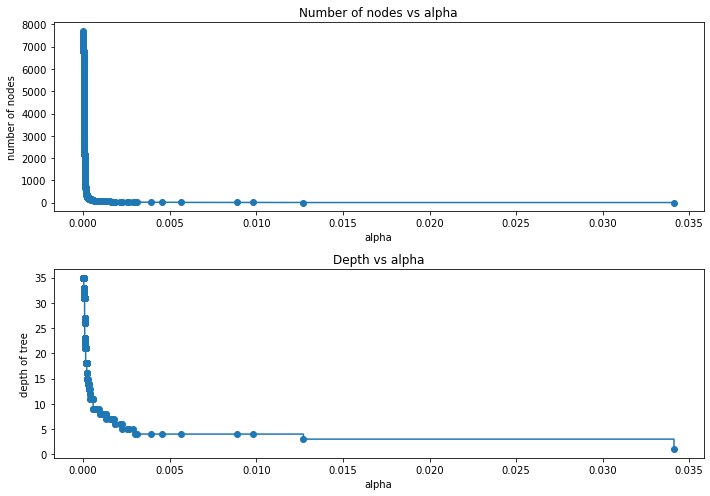

<IPython.core.display.Javascript object>

In [126]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### F1_Score vs alpha for training and testing sets

In [127]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

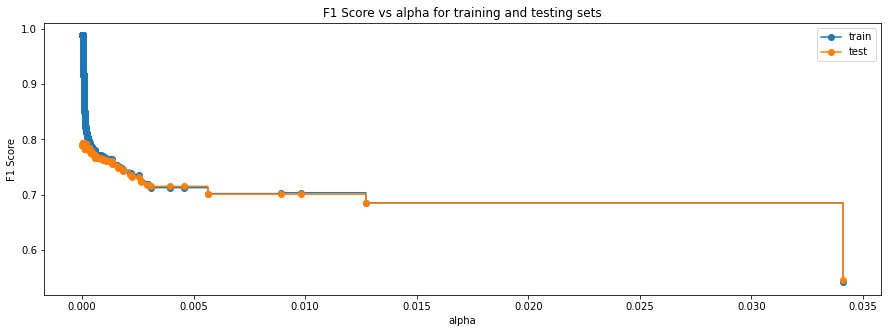

<IPython.core.display.Javascript object>

In [128]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [129]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=6.369194144228817e-05, class_weight='balanced',
                       random_state=1)


<IPython.core.display.Javascript object>

#### Checking performance on training set

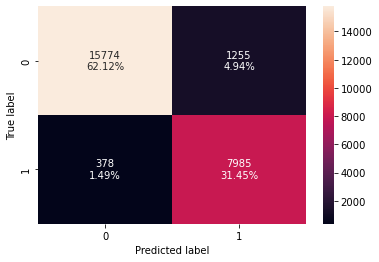

<IPython.core.display.Javascript object>

In [130]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [131]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.93569,0.95480,0.86418,0.90723


<IPython.core.display.Javascript object>

#### Checking performance on test set

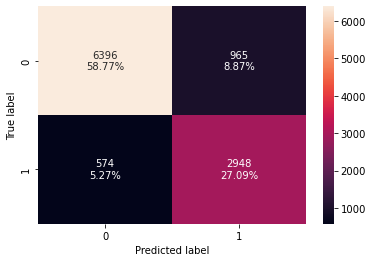

<IPython.core.display.Javascript object>

In [132]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [133]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.85859,0.83702,0.75339,0.79301


<IPython.core.display.Javascript object>

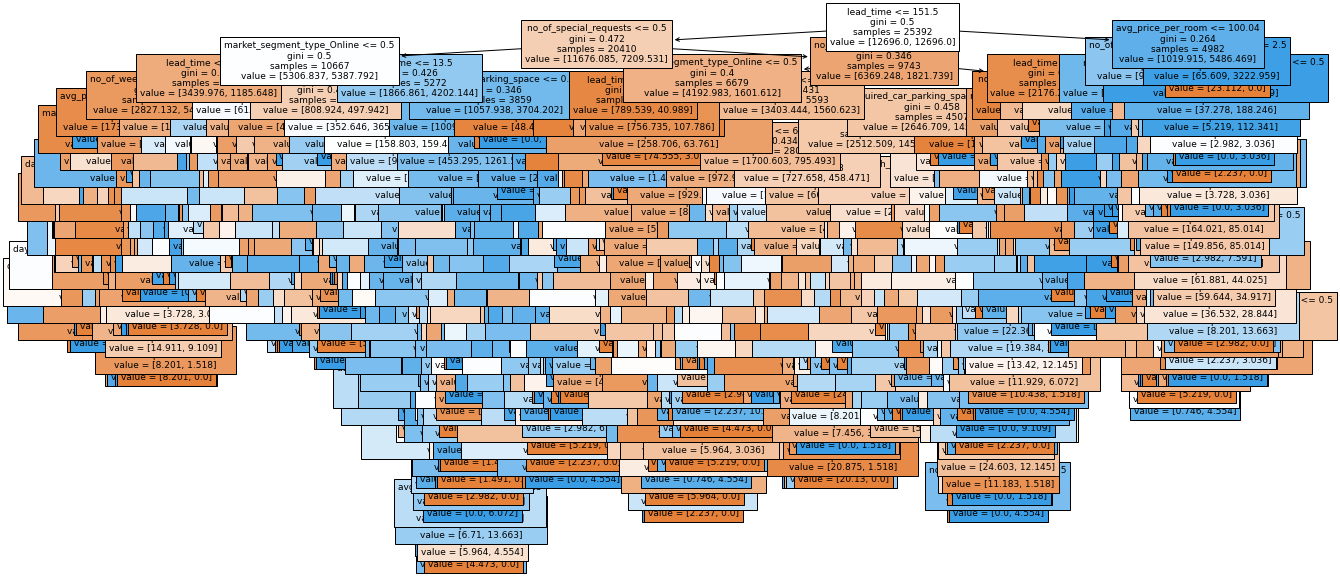

<IPython.core.display.Javascript object>

In [134]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [135]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- no

<IPython.core.display.Javascript object>

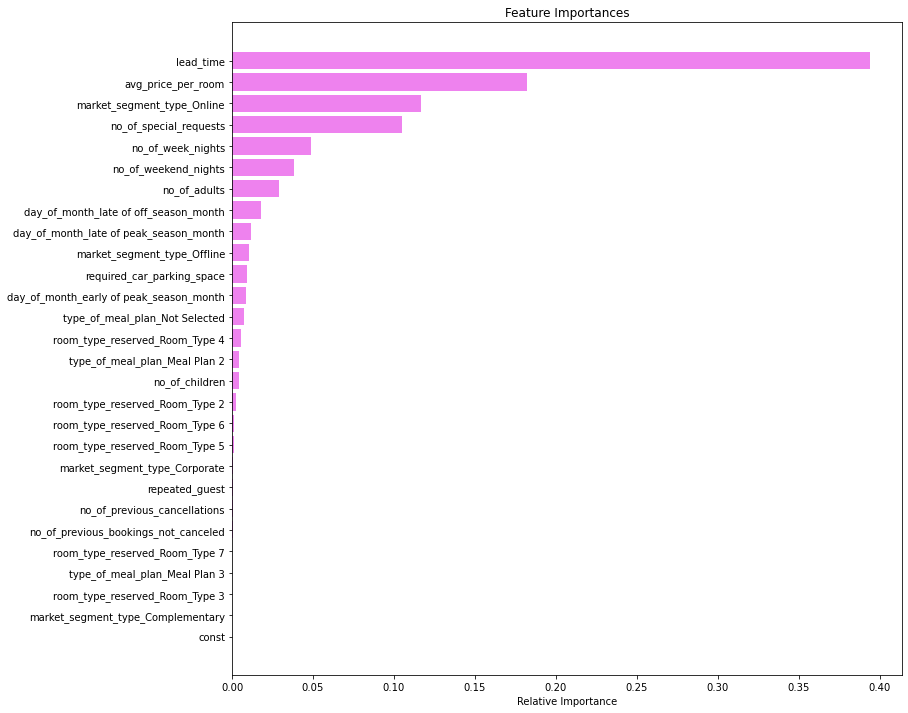

<IPython.core.display.Javascript object>

In [136]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [137]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Threshold = 0.5",
    "Logistic Regression Threshold = 0.33",
    "Logistic Regression Threshold = 0.42",
    "Decision Tree sklearn",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]

<IPython.core.display.Javascript object>

In [138]:
# test performance comparison
models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Threshold = 0.5",
    "Logistic Regression Threshold = 0.33",
    "Logistic Regression Threshold = 0.42",
    "Decision Tree sklearn",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]

<IPython.core.display.Javascript object>

In [139]:
models_train_comp_df

,Logistic Regression Threshold = 0.5,Logistic Regression Threshold = 0.33,Logistic Regression Threshold = 0.42,Decision Tree sklearn,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.79738,0.78040,0.79820,0.99338,0.99208,0.83054,0.93569
Recall,0.60875,0.76587,0.69126,0.98457,0.99510,0.78381,0.95480
Precision,0.73105,0.63903,0.69458,0.99529,0.98114,0.72431,0.86418
F1,0.66432,0.69673,0.69292,0.98990,0.98807,0.75289,0.90723


<IPython.core.display.Javascript object>

In [140]:
models_test_comp_df

,Logistic Regression Threshold = 0.5,Logistic Regression Threshold = 0.33,Logistic Regression Threshold = 0.42,Decision Tree sklearn,Decision Tree with class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.80116,0.78609,0.80033,0.86401,0.86318,0.83323,0.85859
Recall,0.61386,0.76888,0.69336,0.79841,0.79955,0.77797,0.83702
Precision,0.72893,0.64140,0.69081,0.78504,0.78244,0.72621,0.75339
F1,0.66646,0.69938,0.69208,0.79167,0.79090,0.75120,0.79301


<IPython.core.display.Javascript object>

## Summary

* All in all, we can see that all the logistic regressions are not overfitting. Although we made a post-pruning to the decision tree, it is still overfitting. Accuracy, recall, precision, and f1 are not matched in the post-pruning training and test set, so only the pre-pruning model in the decision tree doesn't over-fitting.
* Choosing the model that has the highest f1 score, we will choose the model that got the pre-pruning decision tree as our final model. 

## Actionable Insights and Recommendations

* lead time, market segement(online), number of special request and the average price for each room are the most important variables in determining if a order will be canceled.
* INN should always pay attention to orders with lead time less than 150 days, house price less than 100 US dollars, and customer's special needs less than or equal to two. Similar orders will be cancelled. When an INN hotel encounters such an order, they should be prepared to show the property as available for rent as soon as the customer cancels, and even put the hotel on pending status until the customer is sure of arriving at the hotel , i.e. can still be booked by other customers, but other customers can be listed and told to be in the pending status of the order. This can minimize the loss caused by the cancellation of the hotel order.
* However, when the number of lead time days is enormous, especially when the lead time is more than 152 days, the room price is more than 100 US dollars. If the customer's special needs are more than two, the order will probably not be canceled, and the hotel should provide services for this type of order. To ensure service quality to enhance the brand reputation of INN.
* We can see from the previous analysis that lead time is much more important than other variables, and this variable accounts for a large proportion of matter. F1 score = 0.75 is good enough, but if you want to be more accurate in future predictions, that is, to further improve the f1 score, you should pay attention to more other variables in data collection, for instance, the distance between the customer's location and the location of the INN, whether the customer takes a flight to the destination, the customer takes the company of the flight (the on-time rate of the flight affects the customer's travel to a large extent) and so on.

------